In [1]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

%matplotlib notebook

In [2]:
# Portfolio Stock Selection
pfolio_assets = ["F", "GOOG", "amzn"]
print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

Number of Portfolio Assets: 3


In [3]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: F
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


              Open   High    Low  Close      Volume
Date                                              
2014-01-02  15.42  15.45  15.28  15.44  31528500.0
2014-01-03  15.52  15.64  15.30  15.51  46122300.0
2014-01-06  15.72  15.76  15.52  15.58  42657600.0
2014-01-07  15.73  15.74  15.35  15.38  54476300.0
2014-01-08  15.60  15.71  15.51  15.54  48448300.0
2014-01-09  15.83  16.02  15.77  15.84  67836500.0
2014-01-10  16.01  16.11  15.94  16.07  44984000.0
2014-01-13  16.37  16.53  16.08  16.11  57566400.0
2014-01-14  16.31  16.43  16.17  16.40  44039200.0
2014-01-15  16.37  16.73  16.35  16.70  64118200.0 

-----------------------------------------------------------------

In [4]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: GOOG
<Quandl API Call> [2] Stock Symbol: amzn

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [5]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,F,GOOG,amzn
Date,,,
2014-03-27,15.25,558.46,338.470
2014-03-28,15.45,559.99,338.290
2014-03-31,15.60,556.97,336.365
2014-04-01,16.32,567.16,342.990
2014-04-02,16.46,567.00,341.960
2014-04-03,16.39,569.74,333.620
2014-04-04,16.13,543.14,323.000
2014-04-07,15.94,538.15,317.760
2014-04-08,16.10,554.90,327.070


In [6]:
# View DataFrame -- Data Completeness
portfolio.count()

F       1006
GOOG    1006
amzn    1006
dtype: int64

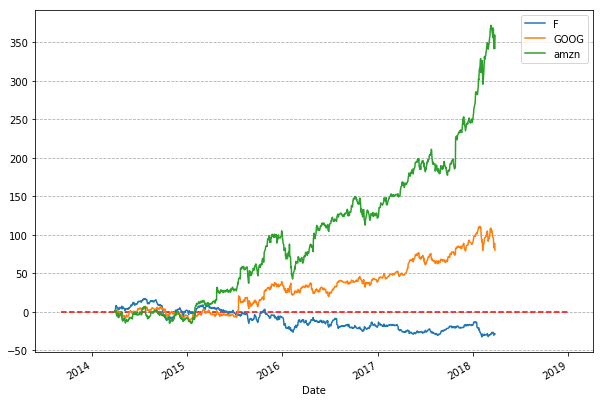

In [7]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = ((portfolio/portfolio.iloc[0] * 100) - 100).plot(figsize=(10,7))
plt.grid(axis="y", linestyle="dashed")
plt.hlines(0, "2013-09-01", "2019-01-01", linestyle="dashed", color="red")

In [8]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,F,GOOG,amzn
Date,,,
2014-03-28,0.013030,0.002736,-0.000532
2014-03-31,0.009662,-0.005408,-0.005707
2014-04-01,0.045120,0.018130,0.019504
2014-04-02,0.008542,-0.000282,-0.003008
2014-04-03,-0.004262,0.004821,-0.024691
2014-04-04,-0.015991,-0.047813,-0.032350
2014-04-07,-0.011849,-0.009230,-0.016356
2014-04-08,0.009988,0.030651,0.028878
2014-04-09,-0.016281,0.016515,0.014373


In [9]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

F      -0.085139
GOOG    0.146184
amzn    0.369855
dtype: float64

In [10]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,F,GOOG,amzn
F,0.052157,0.016806,0.018396
GOOG,0.016806,0.050542,0.038869
amzn,0.018396,0.038869,0.083850


In [11]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,F,GOOG,amzn
F,1.000000,0.327334,0.278170
GOOG,0.327334,1.000000,0.597074
amzn,0.278170,0.597074,1.000000


In [12]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

3

In [13]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 2500
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'F': 0.3459, 'GOOG': 0.1881, 'amzn': 0.466, 'RTN': 0.1704, 'VOL': 0.2029, 'Sharpe': 0.3569} 


 {'F': 0.4712, 'GOOG': 0.461, 'amzn': 0.0679, 'RTN': 0.0524, 'VOL': 0.1833, 'Sharpe': -0.2489} 


 {'F': 0.445, 'GOOG': 0.4463, 'amzn': 0.1087, 'RTN': 0.0676, 'VOL': 0.1833, 'Sharpe': -0.166} 


 {'F': 0.1479, 'GOOG': 0.4565, 'amzn': 0.3956, 'RTN': 0.2005, 'VOL': 0.208, 'Sharpe': 0.4927} 


 {'F': 0.479, 'GOOG': 0.3841, 'amzn': 0.1369, 'RTN': 0.066, 'VOL': 0.1835, 'Sharpe': -0.1743} 


 {'F': 0.1171, 'GOOG': 0.8124, 'amzn': 0.0705, 'RTN': 0.1349, 'VOL': 0.206, 'Sharpe': 0.179} 


 {'F': 0.3171, 'GOOG': 0.4905, 'amzn': 0.1924, 'RTN': 0.1159, 'VOL': 0.1879, 'Sharpe': 0.095} 


 {'F': 0.2477, 'GOOG': 0.5902, 'amzn': 0.1621, 'RTN': 0.1251, 'VOL': 0.1919, 'Sharpe': 0.1414} 


 {'F': 0.0496, 'GOOG': 0.6545, 'amzn': 0.2959, 'RTN': 0.2009, 'VOL': 0.214, 'Sharpe': 0.4808} 


 {'F': 0.3187, 'GOOG': 0.555, 'amzn': 0.1264, 'RTN': 0.1007, 'VOL': 0.1873, 'Sharpe': 0.0146} 


 {'F': 0.5179, 'GOOG': 0.338


 {'F': 0.3106, 'GOOG': 0.4646, 'amzn': 0.2248, 'RTN': 0.1246, 'VOL': 0.189, 'Sharpe': 0.1409} 


 {'F': 0.3637, 'GOOG': 0.3511, 'amzn': 0.2852, 'RTN': 0.1258, 'VOL': 0.1893, 'Sharpe': 0.1471} 


 {'F': 0.2152, 'GOOG': 0.179, 'amzn': 0.6058, 'RTN': 0.2319, 'VOL': 0.2221, 'Sharpe': 0.6029} 


 {'F': 0.3906, 'GOOG': 0.3111, 'amzn': 0.2982, 'RTN': 0.1225, 'VOL': 0.1895, 'Sharpe': 0.1294} 


 {'F': 0.3944, 'GOOG': 0.3397, 'amzn': 0.2659, 'RTN': 0.1144, 'VOL': 0.1878, 'Sharpe': 0.0874} 


 {'F': 0.3954, 'GOOG': 0.4122, 'amzn': 0.1924, 'RTN': 0.0977, 'VOL': 0.1852, 'Sharpe': -0.0014} 


 {'F': 0.3925, 'GOOG': 0.048, 'amzn': 0.5595, 'RTN': 0.1806, 'VOL': 0.2126, 'Sharpe': 0.3883} 


 {'F': 0.7496, 'GOOG': 0.2135, 'amzn': 0.0369, 'RTN': -0.0189, 'VOL': 0.1968, 'Sharpe': -0.5942} 


 {'F': 0.2852, 'GOOG': 0.5523, 'amzn': 0.1625, 'RTN': 0.1166, 'VOL': 0.1893, 'Sharpe': 0.098} 


 {'F': 0.6174, 'GOOG': 0.1963, 'amzn': 0.1862, 'RTN': 0.045, 'VOL': 0.1894, 'Sharpe': -0.2797} 


 {'F': 0.5047, 'GOOG


 {'F': 0.3302, 'GOOG': 0.375, 'amzn': 0.2948, 'RTN': 0.1357, 'VOL': 0.1908, 'Sharpe': 0.1977} 


 {'F': 0.4954, 'GOOG': 0.4052, 'amzn': 0.0994, 'RTN': 0.0538, 'VOL': 0.1833, 'Sharpe': -0.2409} 


 {'F': 0.044, 'GOOG': 0.5716, 'amzn': 0.3844, 'RTN': 0.222, 'VOL': 0.2181, 'Sharpe': 0.5685} 


 {'F': 0.4414, 'GOOG': 0.1731, 'amzn': 0.3856, 'RTN': 0.1303, 'VOL': 0.1953, 'Sharpe': 0.1655} 


 {'F': 0.4288, 'GOOG': 0.3036, 'amzn': 0.2675, 'RTN': 0.1068, 'VOL': 0.1875, 'Sharpe': 0.0471} 


 {'F': 0.2995, 'GOOG': 0.3018, 'amzn': 0.3986, 'RTN': 0.1661, 'VOL': 0.1985, 'Sharpe': 0.3429} 


 {'F': 0.3802, 'GOOG': 0.5347, 'amzn': 0.0851, 'RTN': 0.0773, 'VOL': 0.1848, 'Sharpe': -0.1123} 


 {'F': 0.5275, 'GOOG': 0.316, 'amzn': 0.1565, 'RTN': 0.0592, 'VOL': 0.1847, 'Sharpe': -0.2103} 


 {'F': 0.4195, 'GOOG': 0.4475, 'amzn': 0.1329, 'RTN': 0.0789, 'VOL': 0.1838, 'Sharpe': -0.1041} 


 {'F': 0.2808, 'GOOG': 0.365, 'amzn': 0.3541, 'RTN': 0.1604, 'VOL': 0.1963, 'Sharpe': 0.3181} 


 {'F': 0.1671, 'GOOG

 {'F': 0.0071, 'GOOG': 0.4781, 'amzn': 0.5147, 'RTN': 0.2597, 'VOL': 0.2306, 'Sharpe': 0.7012} 


 {'F': 0.518, 'GOOG': 0.0579, 'amzn': 0.4241, 'RTN': 0.1212, 'VOL': 0.2006, 'Sharpe': 0.1157} 


 {'F': 0.2533, 'GOOG': 0.4344, 'amzn': 0.3123, 'RTN': 0.1574, 'VOL': 0.1955, 'Sharpe': 0.3041} 


 {'F': 0.1292, 'GOOG': 0.6524, 'amzn': 0.2184, 'RTN': 0.1652, 'VOL': 0.2033, 'Sharpe': 0.3303} 


 {'F': 0.5777, 'GOOG': 0.079, 'amzn': 0.3433, 'RTN': 0.0893, 'VOL': 0.1963, 'Sharpe': -0.0442} 


 {'F': 0.4778, 'GOOG': 0.1706, 'amzn': 0.3516, 'RTN': 0.1143, 'VOL': 0.1932, 'Sharpe': 0.0843} 


 {'F': 0.254, 'GOOG': 0.3266, 'amzn': 0.4194, 'RTN': 0.1812, 'VOL': 0.2021, 'Sharpe': 0.4117} 


 {'F': 0.5046, 'GOOG': 0.4087, 'amzn': 0.0867, 'RTN': 0.0488, 'VOL': 0.1834, 'Sharpe': -0.268} 


 {'F': 0.6816, 'GOOG': 0.2887, 'amzn': 0.0297, 'RTN': -0.0048, 'VOL': 0.1912, 'Sharpe': -0.5379} 


 {'F': 0.5112, 'GOOG': 0.4039, 'amzn': 0.0849, 'RTN': 0.0469, 'VOL': 0.1835, 'Sharpe': -0.2783} 


 {'F': 0.4929, 'GOO


 {'F': 0.0779, 'GOOG': 0.3941, 'amzn': 0.528, 'RTN': 0.2463, 'VOL': 0.2242, 'Sharpe': 0.6613} 


 {'F': 0.2845, 'GOOG': 0.2338, 'amzn': 0.4817, 'RTN': 0.1881, 'VOL': 0.2061, 'Sharpe': 0.4372} 


 {'F': 0.1388, 'GOOG': 0.6874, 'amzn': 0.1738, 'RTN': 0.1529, 'VOL': 0.202, 'Sharpe': 0.272} 


 {'F': 0.391, 'GOOG': 0.1927, 'amzn': 0.4163, 'RTN': 0.1488, 'VOL': 0.1978, 'Sharpe': 0.257} 


 {'F': 0.4931, 'GOOG': 0.3454, 'amzn': 0.1615, 'RTN': 0.0682, 'VOL': 0.1841, 'Sharpe': -0.1616} 


 {'F': 0.2363, 'GOOG': 0.3506, 'amzn': 0.4132, 'RTN': 0.1839, 'VOL': 0.2027, 'Sharpe': 0.4241} 


 {'F': 0.2468, 'GOOG': 0.295, 'amzn': 0.4582, 'RTN': 0.1916, 'VOL': 0.2057, 'Sharpe': 0.4551} 


 {'F': 0.3584, 'GOOG': 0.2317, 'amzn': 0.4099, 'RTN': 0.1549, 'VOL': 0.1977, 'Sharpe': 0.2881} 


 {'F': 0.3323, 'GOOG': 0.1092, 'amzn': 0.5585, 'RTN': 0.1942, 'VOL': 0.2129, 'Sharpe': 0.4521} 


 {'F': 0.4261, 'GOOG': 0.2947, 'amzn': 0.2792, 'RTN': 0.1101, 'VOL': 0.1881, 'Sharpe': 0.0641} 


 {'F': 0.4219, 'GOOG': 0

 {'F': 0.3018, 'GOOG': 0.2964, 'amzn': 0.4018, 'RTN': 0.1662, 'VOL': 0.1986, 'Sharpe': 0.3436} 


 {'F': 0.0823, 'GOOG': 0.4606, 'amzn': 0.4571, 'RTN': 0.2294, 'VOL': 0.2182, 'Sharpe': 0.6021} 


 {'F': 0.081, 'GOOG': 0.426, 'amzn': 0.493, 'RTN': 0.2377, 'VOL': 0.221, 'Sharpe': 0.6321} 


 {'F': 0.2946, 'GOOG': 0.3409, 'amzn': 0.3645, 'RTN': 0.1596, 'VOL': 0.1963, 'Sharpe': 0.3136} 


 {'F': 0.2342, 'GOOG': 0.3836, 'amzn': 0.3821, 'RTN': 0.1775, 'VOL': 0.2006, 'Sharpe': 0.3961} 


 {'F': 0.1594, 'GOOG': 0.1712, 'amzn': 0.6695, 'RTN': 0.2591, 'VOL': 0.2327, 'Sharpe': 0.6922} 


 {'F': 0.0311, 'GOOG': 0.3334, 'amzn': 0.6355, 'RTN': 0.2811, 'VOL': 0.2389, 'Sharpe': 0.7665} 


 {'F': 0.2389, 'GOOG': 0.343, 'amzn': 0.418, 'RTN': 0.1844, 'VOL': 0.2029, 'Sharpe': 0.426} 


 {'F': 0.2138, 'GOOG': 0.0389, 'amzn': 0.7473, 'RTN': 0.2639, 'VOL': 0.2402, 'Sharpe': 0.6905} 


 {'F': 0.0878, 'GOOG': 0.411, 'amzn': 0.5012, 'RTN': 0.238, 'VOL': 0.221, 'Sharpe': 0.6334} 


 {'F': 0.1552, 'GOOG': 0.4564,

 {'F': 0.3581, 'GOOG': 0.1542, 'amzn': 0.4876, 'RTN': 0.1724, 'VOL': 0.2048, 'Sharpe': 0.3632} 


 {'F': 0.145, 'GOOG': 0.4377, 'amzn': 0.4173, 'RTN': 0.206, 'VOL': 0.2096, 'Sharpe': 0.5151} 


 {'F': 0.2279, 'GOOG': 0.2961, 'amzn': 0.476, 'RTN': 0.1999, 'VOL': 0.2082, 'Sharpe': 0.4896} 


 {'F': 0.4387, 'GOOG': 0.1915, 'amzn': 0.3698, 'RTN': 0.1274, 'VOL': 0.194, 'Sharpe': 0.1516} 


 {'F': 0.4503, 'GOOG': 0.4601, 'amzn': 0.0896, 'RTN': 0.0621, 'VOL': 0.1833, 'Sharpe': -0.1961} 


 {'F': 0.0928, 'GOOG': 0.5205, 'amzn': 0.3867, 'RTN': 0.2112, 'VOL': 0.2128, 'Sharpe': 0.5321} 


 {'F': 0.302, 'GOOG': 0.2315, 'amzn': 0.4665, 'RTN': 0.1807, 'VOL': 0.2041, 'Sharpe': 0.4051} 


 {'F': 0.7692, 'GOOG': 0.1938, 'amzn': 0.0369, 'RTN': -0.0235, 'VOL': 0.1987, 'Sharpe': -0.6114} 


 {'F': 0.2809, 'GOOG': 0.5129, 'amzn': 0.2062, 'RTN': 0.1273, 'VOL': 0.1902, 'Sharpe': 0.1542} 


 {'F': 0.2857, 'GOOG': 0.6175, 'amzn': 0.0967, 'RTN': 0.1017, 'VOL': 0.1895, 'Sharpe': 0.0196} 


 {'F': 0.4103, 'GOOG':

 {'F': 0.6409, 'GOOG': 0.3212, 'amzn': 0.0379, 'RTN': 0.0064, 'VOL': 0.1885, 'Sharpe': -0.486} 


 {'F': 0.007, 'GOOG': 0.5473, 'amzn': 0.4456, 'RTN': 0.2442, 'VOL': 0.2258, 'Sharpe': 0.6475} 


 {'F': 0.4445, 'GOOG': 0.014, 'amzn': 0.5414, 'RTN': 0.1645, 'VOL': 0.2111, 'Sharpe': 0.3148} 


 {'F': 0.3994, 'GOOG': 0.4336, 'amzn': 0.1671, 'RTN': 0.0912, 'VOL': 0.1846, 'Sharpe': -0.037} 


 {'F': 0.3964, 'GOOG': 0.5966, 'amzn': 0.007, 'RTN': 0.0561, 'VOL': 0.1859, 'Sharpe': -0.2256} 


 {'F': 0.4773, 'GOOG': 0.3251, 'amzn': 0.1976, 'RTN': 0.08, 'VOL': 0.1849, 'Sharpe': -0.0975} 


 {'F': 0.3054, 'GOOG': 0.2818, 'amzn': 0.4128, 'RTN': 0.1679, 'VOL': 0.1993, 'Sharpe': 0.3504} 


 {'F': 0.0146, 'GOOG': 0.6755, 'amzn': 0.31, 'RTN': 0.2121, 'VOL': 0.2189, 'Sharpe': 0.5215} 


 {'F': 0.2824, 'GOOG': 0.4105, 'amzn': 0.3071, 'RTN': 0.1495, 'VOL': 0.1936, 'Sharpe': 0.2662} 


 {'F': 0.2297, 'GOOG': 0.3433, 'amzn': 0.4271, 'RTN': 0.1886, 'VOL': 0.2041, 'Sharpe': 0.4439} 


 {'F': 0.4714, 'GOOG': 0.


 {'F': 0.4322, 'GOOG': 0.293, 'amzn': 0.2748, 'RTN': 0.1077, 'VOL': 0.1879, 'Sharpe': 0.0514} 


 {'F': 0.4908, 'GOOG': 0.4458, 'amzn': 0.0635, 'RTN': 0.0468, 'VOL': 0.1834, 'Sharpe': -0.2789} 


 {'F': 0.4994, 'GOOG': 0.3213, 'amzn': 0.1793, 'RTN': 0.0708, 'VOL': 0.1846, 'Sharpe': -0.1476} 


 {'F': 0.4426, 'GOOG': 0.0854, 'amzn': 0.4719, 'RTN': 0.1493, 'VOL': 0.2034, 'Sharpe': 0.2525} 


 {'F': 0.4717, 'GOOG': 0.418, 'amzn': 0.1103, 'RTN': 0.0617, 'VOL': 0.1833, 'Sharpe': -0.1979} 


 {'F': 0.2407, 'GOOG': 0.4174, 'amzn': 0.3418, 'RTN': 0.167, 'VOL': 0.1978, 'Sharpe': 0.3486} 


 {'F': 0.4667, 'GOOG': 0.3595, 'amzn': 0.1738, 'RTN': 0.0771, 'VOL': 0.1841, 'Sharpe': -0.1134} 


 {'F': 0.3265, 'GOOG': 0.3008, 'amzn': 0.3727, 'RTN': 0.154, 'VOL': 0.1956, 'Sharpe': 0.2863} 


 {'F': 0.3481, 'GOOG': 0.335, 'amzn': 0.3169, 'RTN': 0.1365, 'VOL': 0.1914, 'Sharpe': 0.2014} 


 {'F': 0.1047, 'GOOG': 0.7584, 'amzn': 0.1369, 'RTN': 0.1526, 'VOL': 0.2061, 'Sharpe': 0.2649} 


 {'F': 0.2849, 'GOOG


 {'F': 0.1781, 'GOOG': 0.2904, 'amzn': 0.5315, 'RTN': 0.2239, 'VOL': 0.2164, 'Sharpe': 0.5817} 


 {'F': 0.2193, 'GOOG': 0.3356, 'amzn': 0.4452, 'RTN': 0.195, 'VOL': 0.2061, 'Sharpe': 0.4707} 


 {'F': 0.4187, 'GOOG': 0.3224, 'amzn': 0.2589, 'RTN': 0.1072, 'VOL': 0.1872, 'Sharpe': 0.0493} 


 {'F': 0.3063, 'GOOG': 0.2943, 'amzn': 0.3994, 'RTN': 0.1647, 'VOL': 0.1983, 'Sharpe': 0.3363} 


 {'F': 0.5111, 'GOOG': 0.034, 'amzn': 0.4549, 'RTN': 0.1297, 'VOL': 0.2034, 'Sharpe': 0.1558} 


 {'F': 0.2975, 'GOOG': 0.3742, 'amzn': 0.3283, 'RTN': 0.1508, 'VOL': 0.1939, 'Sharpe': 0.2722} 


 {'F': 0.3905, 'GOOG': 0.1547, 'amzn': 0.4548, 'RTN': 0.1576, 'VOL': 0.2013, 'Sharpe': 0.2958} 


 {'F': 0.5505, 'GOOG': 0.4349, 'amzn': 0.0146, 'RTN': 0.0221, 'VOL': 0.185, 'Sharpe': -0.4103} 


 {'F': 0.1897, 'GOOG': 0.1761, 'amzn': 0.6342, 'RTN': 0.2441, 'VOL': 0.2267, 'Sharpe': 0.6446} 


 {'F': 0.3346, 'GOOG': 0.4348, 'amzn': 0.2306, 'RTN': 0.1204, 'VOL': 0.1881, 'Sharpe': 0.1189} 


 {'F': 0.488, 'GOOG':


 {'F': 0.268, 'GOOG': 0.2079, 'amzn': 0.5242, 'RTN': 0.2014, 'VOL': 0.2109, 'Sharpe': 0.4905} 


 {'F': 0.2995, 'GOOG': 0.0295, 'amzn': 0.671, 'RTN': 0.227, 'VOL': 0.2274, 'Sharpe': 0.5673} 


 {'F': 0.2955, 'GOOG': 0.4905, 'amzn': 0.2141, 'RTN': 0.1257, 'VOL': 0.1895, 'Sharpe': 0.1462} 


 {'F': 0.9476, 'GOOG': 0.0195, 'amzn': 0.0328, 'RTN': -0.0657, 'VOL': 0.2208, 'Sharpe': -0.7412} 


 {'F': 0.3836, 'GOOG': 0.3824, 'amzn': 0.234, 'RTN': 0.1098, 'VOL': 0.1867, 'Sharpe': 0.0631} 


 {'F': 0.577, 'GOOG': 0.3214, 'amzn': 0.1017, 'RTN': 0.0355, 'VOL': 0.1854, 'Sharpe': -0.3373} 


 {'F': 0.4701, 'GOOG': 0.2366, 'amzn': 0.2933, 'RTN': 0.103, 'VOL': 0.1891, 'Sharpe': 0.0267} 


 {'F': 0.1493, 'GOOG': 0.4179, 'amzn': 0.4328, 'RTN': 0.2085, 'VOL': 0.2103, 'Sharpe': 0.5252} 


 {'F': 0.5149, 'GOOG': 0.1261, 'amzn': 0.359, 'RTN': 0.1074, 'VOL': 0.1948, 'Sharpe': 0.0482} 


 {'F': 0.2719, 'GOOG': 0.5093, 'amzn': 0.2189, 'RTN': 0.1322, 'VOL': 0.191, 'Sharpe': 0.1793} 


 {'F': 0.3372, 'GOOG': 0


 {'F': 0.1147, 'GOOG': 0.2129, 'amzn': 0.6724, 'RTN': 0.27, 'VOL': 0.2359, 'Sharpe': 0.7291} 


 {'F': 0.3911, 'GOOG': 0.3585, 'amzn': 0.2503, 'RTN': 0.1117, 'VOL': 0.1871, 'Sharpe': 0.0732} 


 {'F': 0.2185, 'GOOG': 0.2263, 'amzn': 0.5552, 'RTN': 0.2198, 'VOL': 0.2164, 'Sharpe': 0.563} 


 {'F': 0.2339, 'GOOG': 0.5781, 'amzn': 0.188, 'RTN': 0.1341, 'VOL': 0.1932, 'Sharpe': 0.1871} 


 {'F': 0.4918, 'GOOG': 0.0327, 'amzn': 0.4755, 'RTN': 0.1388, 'VOL': 0.2049, 'Sharpe': 0.1991} 


 {'F': 0.7277, 'GOOG': 0.2223, 'amzn': 0.05, 'RTN': -0.011, 'VOL': 0.1949, 'Sharpe': -0.5593} 


 {'F': 0.0814, 'GOOG': 0.465, 'amzn': 0.4536, 'RTN': 0.2288, 'VOL': 0.2181, 'Sharpe': 0.5999} 


 {'F': 0.1715, 'GOOG': 0.7454, 'amzn': 0.0831, 'RTN': 0.1251, 'VOL': 0.1996, 'Sharpe': 0.1358} 


 {'F': 0.0038, 'GOOG': 0.4677, 'amzn': 0.5285, 'RTN': 0.2635, 'VOL': 0.232, 'Sharpe': 0.7134} 


 {'F': 0.2569, 'GOOG': 0.5631, 'amzn': 0.1801, 'RTN': 0.127, 'VOL': 0.1914, 'Sharpe': 0.1517} 


 {'F': 0.2988, 'GOOG': 0.53


 {'F': 0.5283, 'GOOG': 0.2016, 'amzn': 0.2701, 'RTN': 0.0844, 'VOL': 0.1892, 'Sharpe': -0.072} 


 {'F': 0.2991, 'GOOG': 0.4, 'amzn': 0.3008, 'RTN': 0.1443, 'VOL': 0.1924, 'Sharpe': 0.2404} 


 {'F': 0.4928, 'GOOG': 0.2027, 'amzn': 0.3045, 'RTN': 0.1003, 'VOL': 0.1903, 'Sharpe': 0.0121} 


 {'F': 0.447, 'GOOG': 0.3839, 'amzn': 0.1691, 'RTN': 0.0806, 'VOL': 0.184, 'Sharpe': -0.0946} 


 {'F': 0.3902, 'GOOG': 0.2382, 'amzn': 0.3716, 'RTN': 0.139, 'VOL': 0.1942, 'Sharpe': 0.2112} 


 {'F': 0.3044, 'GOOG': 0.235, 'amzn': 0.4606, 'RTN': 0.1788, 'VOL': 0.2034, 'Sharpe': 0.3971} 


 {'F': 0.3278, 'GOOG': 0.3675, 'amzn': 0.3047, 'RTN': 0.1385, 'VOL': 0.1914, 'Sharpe': 0.2115} 


 {'F': 0.2235, 'GOOG': 0.3958, 'amzn': 0.3807, 'RTN': 0.1796, 'VOL': 0.2012, 'Sharpe': 0.4057} 


 {'F': 0.4839, 'GOOG': 0.0266, 'amzn': 0.4895, 'RTN': 0.1437, 'VOL': 0.2062, 'Sharpe': 0.2218} 


 {'F': 0.3335, 'GOOG': 0.5687, 'amzn': 0.0978, 'RTN': 0.0909, 'VOL': 0.1867, 'Sharpe': -0.038} 


 {'F': 0.3725, 'GOOG': 0.


 {'F': 0.4865, 'GOOG': 0.4561, 'amzn': 0.0574, 'RTN': 0.0465, 'VOL': 0.1835, 'Sharpe': -0.2808} 


 {'F': 0.4084, 'GOOG': 0.2456, 'amzn': 0.346, 'RTN': 0.1291, 'VOL': 0.1923, 'Sharpe': 0.1619} 


 {'F': 0.149, 'GOOG': 0.4932, 'amzn': 0.3578, 'RTN': 0.1917, 'VOL': 0.2058, 'Sharpe': 0.4555} 


 {'F': 0.298, 'GOOG': 0.3033, 'amzn': 0.3986, 'RTN': 0.1664, 'VOL': 0.1985, 'Sharpe': 0.3446} 


 {'F': 0.3743, 'GOOG': 0.5315, 'amzn': 0.0942, 'RTN': 0.0807, 'VOL': 0.1849, 'Sharpe': -0.0937} 


 {'F': 0.0362, 'GOOG': 0.5002, 'amzn': 0.4636, 'RTN': 0.2415, 'VOL': 0.2236, 'Sharpe': 0.6419} 


 {'F': 0.0991, 'GOOG': 0.4683, 'amzn': 0.4326, 'RTN': 0.22, 'VOL': 0.2149, 'Sharpe': 0.5678} 


 {'F': 0.4521, 'GOOG': 0.2004, 'amzn': 0.3476, 'RTN': 0.1194, 'VOL': 0.1925, 'Sharpe': 0.1109} 


 {'F': 0.2638, 'GOOG': 0.6711, 'amzn': 0.0651, 'RTN': 0.0997, 'VOL': 0.1916, 'Sharpe': 0.009} 


 {'F': 0.2808, 'GOOG': 0.3792, 'amzn': 0.34, 'RTN': 0.1573, 'VOL': 0.1954, 'Sharpe': 0.3033} 


 {'F': 0.4103, 'GOOG': 0.


 {'F': 0.5283, 'GOOG': 0.4383, 'amzn': 0.0335, 'RTN': 0.0315, 'VOL': 0.1842, 'Sharpe': -0.3612} 


 {'F': 0.4396, 'GOOG': 0.066, 'amzn': 0.4944, 'RTN': 0.1551, 'VOL': 0.2057, 'Sharpe': 0.2774} 


 {'F': 0.0849, 'GOOG': 0.4684, 'amzn': 0.4468, 'RTN': 0.2265, 'VOL': 0.2172, 'Sharpe': 0.5914} 


 {'F': 0.238, 'GOOG': 0.4012, 'amzn': 0.3607, 'RTN': 0.1718, 'VOL': 0.1991, 'Sharpe': 0.3708} 


 {'F': 0.0833, 'GOOG': 0.0205, 'amzn': 0.8962, 'RTN': 0.3274, 'VOL': 0.2683, 'Sharpe': 0.855} 


 {'F': 0.1923, 'GOOG': 0.7449, 'amzn': 0.0628, 'RTN': 0.1158, 'VOL': 0.198, 'Sharpe': 0.0897} 


 {'F': 0.4274, 'GOOG': 0.2581, 'amzn': 0.3145, 'RTN': 0.1177, 'VOL': 0.1901, 'Sharpe': 0.1035} 


 {'F': 0.5284, 'GOOG': 0.362, 'amzn': 0.1096, 'RTN': 0.0485, 'VOL': 0.1839, 'Sharpe': -0.2693} 


 {'F': 0.1582, 'GOOG': 0.3622, 'amzn': 0.4796, 'RTN': 0.2169, 'VOL': 0.2132, 'Sharpe': 0.5576} 


 {'F': 0.4985, 'GOOG': 0.0379, 'amzn': 0.4636, 'RTN': 0.1346, 'VOL': 0.2039, 'Sharpe': 0.1793} 


 {'F': 0.7655, 'GOOG':


 {'F': 0.3126, 'GOOG': 0.1661, 'amzn': 0.5213, 'RTN': 0.1905, 'VOL': 0.2092, 'Sharpe': 0.4421} 


 {'F': 0.5475, 'GOOG': 0.2993, 'amzn': 0.1531, 'RTN': 0.0538, 'VOL': 0.1852, 'Sharpe': -0.2389} 


 {'F': 0.4806, 'GOOG': 0.4938, 'amzn': 0.0255, 'RTN': 0.0407, 'VOL': 0.184, 'Sharpe': -0.3115} 


 {'F': 0.5044, 'GOOG': 0.0424, 'amzn': 0.4531, 'RTN': 0.1309, 'VOL': 0.203, 'Sharpe': 0.1619} 


 {'F': 0.1728, 'GOOG': 0.384, 'amzn': 0.4432, 'RTN': 0.2053, 'VOL': 0.2092, 'Sharpe': 0.5131} 


 {'F': 0.1381, 'GOOG': 0.0494, 'amzn': 0.8125, 'RTN': 0.296, 'VOL': 0.2529, 'Sharpe': 0.7829} 


 {'F': 0.2246, 'GOOG': 0.4424, 'amzn': 0.333, 'RTN': 0.1687, 'VOL': 0.1984, 'Sharpe': 0.3563} 


 {'F': 0.3947, 'GOOG': 0.3441, 'amzn': 0.2613, 'RTN': 0.1133, 'VOL': 0.1876, 'Sharpe': 0.0817} 


 {'F': 0.1525, 'GOOG': 0.4768, 'amzn': 0.3707, 'RTN': 0.1938, 'VOL': 0.2061, 'Sharpe': 0.4649} 


 {'F': 0.1004, 'GOOG': 0.7414, 'amzn': 0.1582, 'RTN': 0.1583, 'VOL': 0.2064, 'Sharpe': 0.2923} 


 {'F': 0.0632, 'GOOG':


 {'F': 0.6817, 'GOOG': 0.0666, 'amzn': 0.2518, 'RTN': 0.0448, 'VOL': 0.1973, 'Sharpe': -0.2696} 


 {'F': 0.0283, 'GOOG': 0.4886, 'amzn': 0.4831, 'RTN': 0.2477, 'VOL': 0.2258, 'Sharpe': 0.6629} 


 {'F': 0.2431, 'GOOG': 0.3439, 'amzn': 0.4129, 'RTN': 0.1823, 'VOL': 0.2022, 'Sharpe': 0.4168} 


 {'F': 0.5465, 'GOOG': 0.2556, 'amzn': 0.1978, 'RTN': 0.064, 'VOL': 0.1865, 'Sharpe': -0.1823} 


 {'F': 0.3693, 'GOOG': 0.4384, 'amzn': 0.1923, 'RTN': 0.1038, 'VOL': 0.1858, 'Sharpe': 0.031} 


 {'F': 0.2929, 'GOOG': 0.383, 'amzn': 0.324, 'RTN': 0.1509, 'VOL': 0.1939, 'Sharpe': 0.2728} 


 {'F': 0.2113, 'GOOG': 0.2185, 'amzn': 0.5702, 'RTN': 0.2249, 'VOL': 0.2183, 'Sharpe': 0.581} 


 {'F': 0.092, 'GOOG': 0.3427, 'amzn': 0.5653, 'RTN': 0.2513, 'VOL': 0.2263, 'Sharpe': 0.6776} 


 {'F': 0.3752, 'GOOG': 0.3604, 'amzn': 0.2644, 'RTN': 0.1185, 'VOL': 0.1881, 'Sharpe': 0.1092} 


 {'F': 0.1455, 'GOOG': 0.4219, 'amzn': 0.4326, 'RTN': 0.2093, 'VOL': 0.2106, 'Sharpe': 0.5284} 


 {'F': 0.1703, 'GOOG': 


 {'F': 0.5311, 'GOOG': 0.187, 'amzn': 0.2819, 'RTN': 0.0864, 'VOL': 0.19, 'Sharpe': -0.0612} 


 {'F': 0.3548, 'GOOG': 0.4011, 'amzn': 0.244, 'RTN': 0.1187, 'VOL': 0.1878, 'Sharpe': 0.1101} 


 {'F': 0.4915, 'GOOG': 0.4757, 'amzn': 0.0328, 'RTN': 0.0398, 'VOL': 0.1838, 'Sharpe': -0.3164} 


 {'F': 0.3257, 'GOOG': 0.3498, 'amzn': 0.3245, 'RTN': 0.1434, 'VOL': 0.1926, 'Sharpe': 0.236} 


 {'F': 0.6747, 'GOOG': 0.1451, 'amzn': 0.1802, 'RTN': 0.0304, 'VOL': 0.1932, 'Sharpe': -0.3498} 


 {'F': 0.3325, 'GOOG': 0.3965, 'amzn': 0.271, 'RTN': 0.1299, 'VOL': 0.1897, 'Sharpe': 0.168} 


 {'F': 0.3277, 'GOOG': 0.3461, 'amzn': 0.3262, 'RTN': 0.1433, 'VOL': 0.1926, 'Sharpe': 0.2354} 


 {'F': 0.0322, 'GOOG': 0.1936, 'amzn': 0.7742, 'RTN': 0.3119, 'VOL': 0.2549, 'Sharpe': 0.8391} 


 {'F': 0.1399, 'GOOG': 0.0221, 'amzn': 0.838, 'RTN': 0.3012, 'VOL': 0.2565, 'Sharpe': 0.7924} 


 {'F': 0.6307, 'GOOG': 0.2007, 'amzn': 0.1686, 'RTN': 0.038, 'VOL': 0.1896, 'Sharpe': -0.3163} 


 {'F': 0.2566, 'GOOG': 0

In [14]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,F,GOOG,RTN,Sharpe,VOL,amzn
0,0.3459,0.1881,0.1704,0.3569,0.2029,0.4660
1,0.4712,0.4610,0.0524,-0.2489,0.1833,0.0679
2,0.4450,0.4463,0.0676,-0.1660,0.1833,0.1087
3,0.1479,0.4565,0.2005,0.4927,0.2080,0.3956
4,0.4790,0.3841,0.0660,-0.1743,0.1835,0.1369


In [15]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,2500.000000,2500.000000,2500.000000
mean,0.198294,0.141620,0.200783
std,0.321383,0.069293,0.015240
min,-0.760200,-0.067600,0.183200
25%,-0.005850,0.096900,0.189300
50%,0.219700,0.141200,0.197050
75%,0.434725,0.187850,0.207625
max,0.929200,0.364200,0.286500


In [16]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [17]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,F,GOOG,amzn
Sharpe,RTN,VOL,,,
0.9292,0.3642,0.2865,0.0095,0.0058,0.9847
0.9247,0.3598,0.2831,0.0050,0.0346,0.9603
0.9128,0.3532,0.2796,0.0162,0.0412,0.9425
0.8951,0.3428,0.2734,0.0254,0.0695,0.9051
0.8798,0.3359,0.2704,0.0437,0.0630,0.8934
0.8588,0.3202,0.2588,0.0128,0.1959,0.7913
0.8566,0.3222,0.2617,0.0436,0.1244,0.8319
0.8550,0.3274,0.2683,0.0833,0.0205,0.8962
0.8534,0.3170,0.2567,0.0060,0.2239,0.7701


In [18]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,F,GOOG,amzn
Sharpe,RTN,VOL,,,
-0.6722,-0.0398,0.2050,0.8278,0.1475,0.0246
-0.6940,-0.0454,0.2066,0.8416,0.1445,0.0139
-0.6982,-0.0487,0.2100,0.8691,0.1033,0.0277
-0.7150,-0.0559,0.2152,0.9077,0.0569,0.0353
-0.7192,-0.0578,0.2166,0.9177,0.0451,0.0372
-0.7290,-0.0587,0.2149,0.9063,0.0722,0.0215
-0.7353,-0.0588,0.2133,0.8947,0.0966,0.0088
-0.7412,-0.0657,0.2208,0.9476,0.0195,0.0328
-0.7544,-0.0676,0.2195,0.9396,0.0444,0.0160


In [19]:
# Identify Minimum Variance Portfolio
mvp_vol = ranked_portfolios.reset_index()["VOL"].min()
#mvp_rtn = ranked_portfolios.reset_index().loc[]
mvp_vol

0.1832

In [20]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

Text(0, 0.5, 'Expected Portfolio Return')

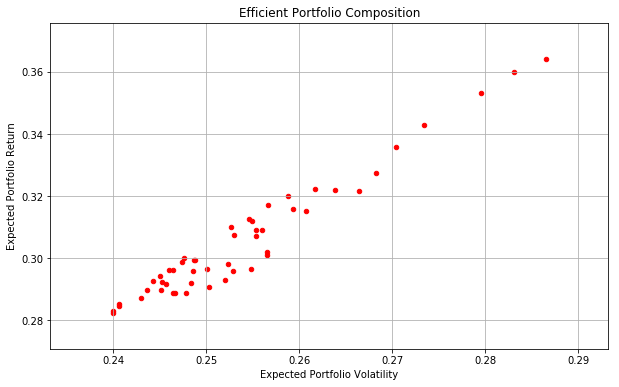

In [21]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
#plt.xlim(.05,.25)
#plt.ylim(-.1, .25)


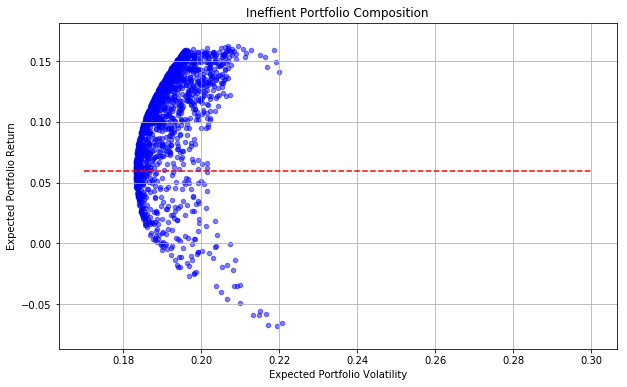

In [26]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.06, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.05,.50)
#plt.ylim(-.1, .25)

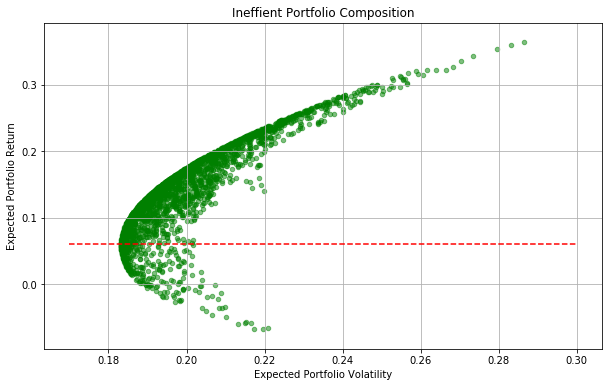

In [25]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.06, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.15,.30)
#plt.ylim(-.1, .5)